In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
exp_name_dis = "FINAL_DIS"
exp_name_cont = "FINAL_CON"
l_s="l_1.0"
base_path = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness"
data_path = base_path + "/my_code/Bayesian-fairness/data"
results_path = base_path + f"/my_code/Bayesian-fairness/results/FINAL/{exp_name_dis}/{l_s}"
results_path_con = base_path + f"/my_code/Bayesian-fairness/results/FINAL/{exp_name_cont}/{l_s}"
save_path = base_path + f"/my_code/Bayesian-fairness/results/FINAL/plots"

# Plots

In [4]:
metric_symbol = {"Total Utility": "T",
                 "Utility": "U",
                 "Fairness": "F"}
runs = range(10)

In [5]:
def get_metrics_from_multi_columns(data, metric_name, runs):
    metrics_columns = [(f"run_{r}", metric_name ) for r in runs]
    data_metric = data[metrics_columns]
    data_metric.columns = [metric_name + f"_{i}" for i in runs]
    return data_metric

In [6]:
def results_metrics(marginal_results, bayes_results, bootstrap_results, metric_name, runs):
    bayes_loss = get_metrics_from_multi_columns(data=bayes_results,
                                                metric_name = metric_name,
                                                runs=runs)
    
    boostrap_loss = get_metrics_from_multi_columns(data=bootstrap_results,
                                                   metric_name = metric_name,
                                                   runs=runs)

    marginal_loss = get_metrics_from_multi_columns(data=marginal_results,
                                                   metric_name = metric_name,
                                                   runs=runs)
    bayes_mean, bayes_std = bayes_loss.mean(axis=1), bayes_loss.std(axis=1)
    bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
    marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
    all_results = {
        f"bayes_mean":bayes_mean,
        f"bayes_std":bayes_std,
        f"bootstrap_mean":bootstrap_mean,
        f"bootstrap_std":bootstrap_std,
        f"marginal_mean":marginal_mean,
        f"marginal_std":marginal_std,

    }
    return pd.DataFrame(all_results)

def discreate_results(results_path, runs):
    bootstrap_results = pd.read_csv(results_path + f"/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/marginal_results_all.csv",header=[0, 1],index_col=[0])
    baysian_results = pd.read_csv(results_path + f"/bayes_results_all.csv",header=[0, 1],index_col=[0])
    

    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                bayes_results=baysian_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)

    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    bayes_results=baysian_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    bayes_results=baysian_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)
    return eval_loss,eval_utility,eval_fainress

In [7]:
def results_metrics_cont(marginal_results, bootstrap_results, metric_name, runs):    
    boostrap_loss = get_metrics_from_multi_columns(data=bootstrap_results,
                                                   metric_name = metric_name,
                                                   runs=runs)

    marginal_loss = get_metrics_from_multi_columns(data=marginal_results,
                                                   metric_name = metric_name,
                                                   runs=runs)
    bootstrap_mean, bootstrap_std = boostrap_loss.mean(axis=1), boostrap_loss.std(axis=1)
    marginal_mean, marginal_std = marginal_loss.mean(axis=1), marginal_loss.std(axis=1)
    all_results = {
        f"bootstrap_mean":bootstrap_mean,
        f"bootstrap_std":bootstrap_std,
        f"marginal_mean":marginal_mean,
        f"marginal_std":marginal_std,

    }
    return pd.DataFrame(all_results)

def cont_results(results_path, runs):
    bootstrap_results = pd.read_csv(results_path + f"/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/marginal_results_all.csv",header=[0, 1],index_col=[0])
    

    eval_loss = results_metrics_cont(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)

    eval_utility = results_metrics_cont(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics_cont(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)
    return eval_loss,eval_utility,eval_fainress

In [8]:
eval_loss_dis, eval_utility_dis, eval_fainress_dis = discreate_results(results_path,runs)
eval_loss_cont, eval_utility_cont, eval_fainress_cont = cont_results(results_path_con,runs)

In [9]:
eval_loss_dis

,bayes_mean,bayes_std,bootstrap_mean,bootstrap_std,marginal_mean,marginal_std
0,0.497208,0.004195,0.485155,0.009929,0.460315,0.014006
1,0.496774,0.008152,0.484298,0.010954,0.452340,0.016647
2,0.498547,0.008450,0.486904,0.010606,0.456989,0.015712
3,0.502257,0.006603,0.492472,0.010420,0.464128,0.018602
4,0.504797,0.007027,0.495821,0.012037,0.464390,0.019052
5,0.506525,0.006620,0.497799,0.011564,0.461787,0.024821
6,0.508614,0.005590,0.500945,0.008040,0.463209,0.019182
7,0.510783,0.006240,0.504069,0.007630,0.463206,0.017452
8,0.512271,0.005115,0.505697,0.006909,0.461762,0.020540
9,0.513814,0.004977,0.508553,0.005273,0.464240,0.018600


In [11]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('axes', labelsize=14)

In [35]:
steps = list( range(1, losses[0]["bootstrap_mean"].shape[0] + 1 ) ) 
training_data = [step * 500 for step in steps]
percentage_of_training_data = [step * 500 * 100/ 6000 for step in steps]

In [36]:
percentage_of_training_data

[8.333333333333334,
 16.666666666666668,
 25.0,
 33.333333333333336,
 41.666666666666664,
 50.0,
 58.333333333333336,
 66.66666666666667,
 75.0,
 83.33333333333333,
 91.66666666666667,
 100.0]

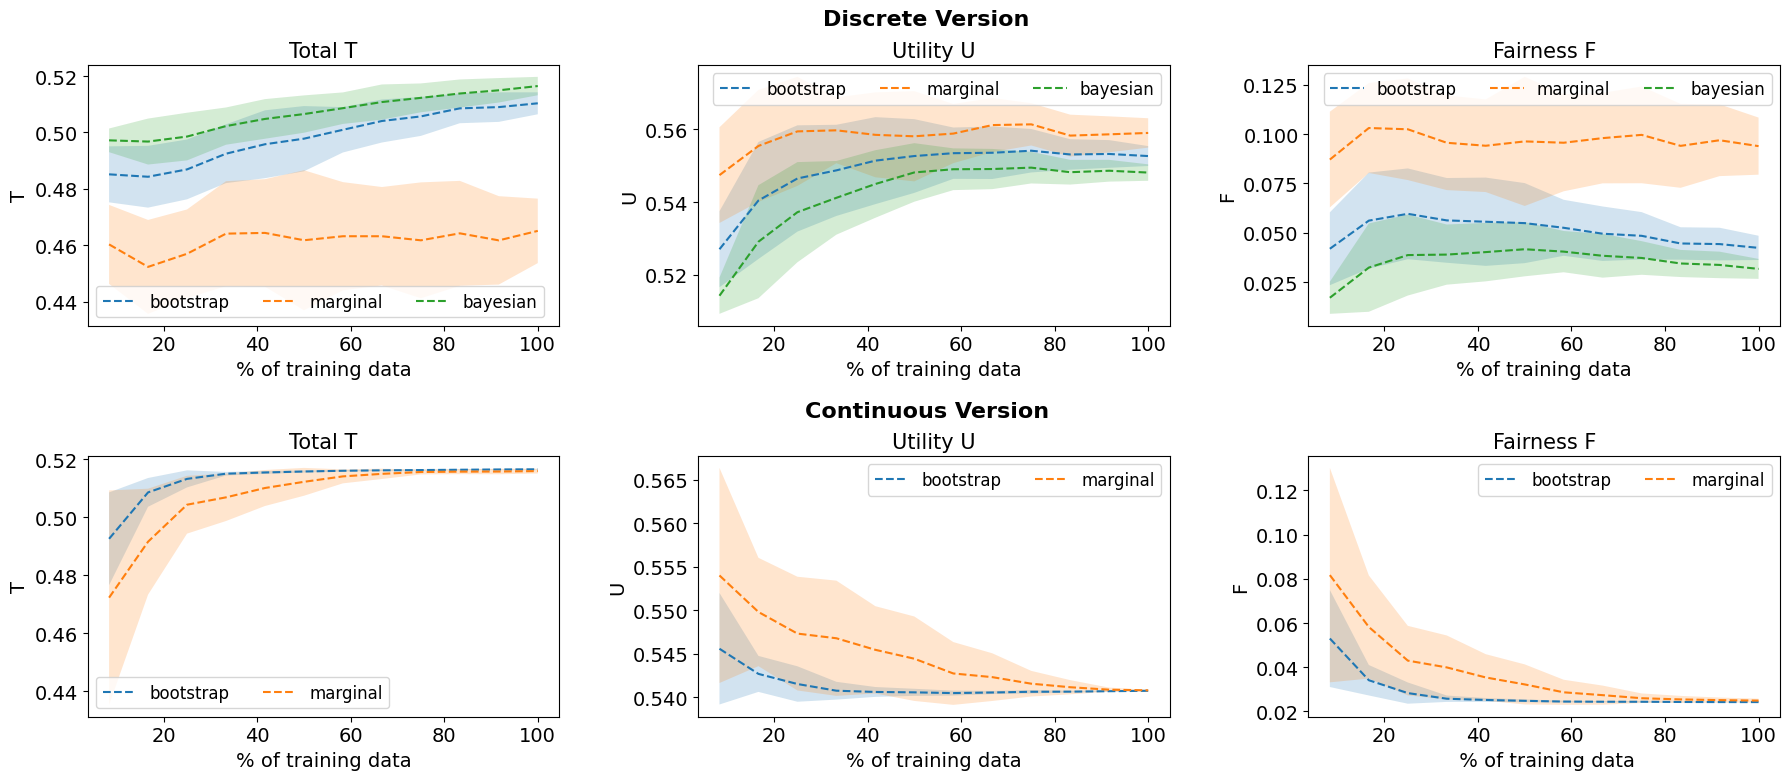

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
fig.text(0.46, 0.95, f'Discrete Version', fontsize = 16, weight='bold')
fig.text(0.45, 0.46, f'Continuous Version', fontsize = 16, weight='bold')

#0.      ######################### plot_continius  #########################

ax_dis  = axes[0]
losses = [eval_loss_dis, eval_utility_dis, eval_fainress_dis]
# ax_dis[0].suptitle(f'Subfigure title 1')
ax_dis[1].set_title("Subplot row ")
x = percentage_of_training_data
ax_dis[0].plot(x, losses[0]["bootstrap_mean"],"--", label = "bootstrap")
ax_dis[0].fill_between(x = x,
                 y1 = (losses[0]["bootstrap_mean"]-losses[0]["bootstrap_std"]).values,
                 y2 = (losses[0]["bootstrap_mean"]+losses[0]["bootstrap_std"]).values,
                 alpha = 0.2)
ax_dis[0].plot(x, losses[0]["marginal_mean"],"--", label = "marginal")
ax_dis[0].fill_between(x = x,
                 y1 = (losses[0]["marginal_mean"]-losses[0]["marginal_std"]).values,
                 y2 = (losses[0]["marginal_mean"]+losses[0]["marginal_std"]).values,
                 alpha = 0.2)
ax_dis[0].plot(x, losses[0]["bayes_mean"],"--", label = "bayesian")
ax_dis[0].fill_between(x = x,
                 y1 = (losses[0]["bayes_mean"]-losses[0]["bayes_std"]).values,
                 y2 = (losses[0]["bayes_mean"]+losses[0]["bayes_std"]).values,
                 alpha = 0.2)
ax_dis[0].set_title("Total T", fontsize=15)
ax_dis[0].set(xlabel='% of training data')
ax_dis[0].set_ylabel(f'T')
ax_dis[0].legend(ncols=3,fontsize=12)

# plot utility
ax_dis[1].plot(x, losses[1]["bootstrap_mean"],"--", label = "bootstrap")
ax_dis[1].fill_between(x = x,
                 y1 = (losses[1]["bootstrap_mean"]-losses[1]["bootstrap_std"]).values,
                 y2 = (losses[1]["bootstrap_mean"]+losses[1]["bootstrap_std"]).values,
                 alpha = 0.2)
ax_dis[1].plot(x, losses[1]["marginal_mean"],"--", label = "marginal")
ax_dis[1].fill_between(x = x,
                 y1 = (losses[1]["marginal_mean"]-losses[1]["marginal_std"]).values,
                 y2 = (losses[1]["marginal_mean"]+losses[1]["marginal_std"]).values,
                 alpha = 0.2)
ax_dis[1].plot(x, losses[1]["bayes_mean"],"--", label = "bayesian")
ax_dis[1].fill_between(x = x,
                 y1 = (losses[1]["bayes_mean"]-losses[1]["bayes_std"]).values,
                 y2 = (losses[1]["bayes_mean"]+losses[1]["bayes_std"]).values,
                 alpha = 0.2)
ax_dis[1].set_title("Utility U", fontsize=15)
ax_dis[1].set(xlabel='% of training data', ylabel='U')
ax_dis[1].legend(ncols=3,fontsize=12)
# fairness
ax_dis[2].plot(x, losses[2]["bootstrap_mean"],"--", label = "bootstrap")
ax_dis[2].fill_between(x =x,
                 y1 = (losses[2]["bootstrap_mean"]-losses[2]["bootstrap_std"]).values,
                 y2 = (losses[2]["bootstrap_mean"]+losses[2]["bootstrap_std"]).values,
                 alpha = 0.2)
ax_dis[2].plot(x, losses[2]["marginal_mean"],"--", label = "marginal")
ax_dis[2].fill_between(x = x,
                 y1 = (losses[2]["marginal_mean"]-losses[2]["marginal_std"]).values,
                 y2 = (losses[2]["marginal_mean"]+losses[2]["marginal_std"]).values,
                 alpha = 0.2)
ax_dis[2].plot(x, losses[2]["bayes_mean"],"--", label = "bayesian")
ax_dis[2].fill_between(x = x,
                 y1 = (losses[2]["bayes_mean"]-losses[2]["bayes_std"]).values,
                 y2 = (losses[2]["bayes_mean"]+losses[2]["bayes_std"]).values,
                 alpha = 0.2)
ax_dis[2].set_title("Fairness F", fontsize=15)
ax_dis[2].set(xlabel='% of training data', ylabel='F')
ax_dis[2].legend(ncol=3,fontsize=12)

# create_subtitle(fig, ax_dis, 'First')


#1.      ######################### plot_continius  #########################



losses = [eval_loss_cont, eval_utility_cont, eval_fainress_cont]
ax_con  = axes[1]
# ax_dis[0].suptitle(f'Subfigure title 1')

x = percentage_of_training_data
ax_con[0].plot(x, losses[0]["bootstrap_mean"],"--", label = "bootstrap")
ax_con[0].fill_between(x = x,
                 y1 = (losses[0]["bootstrap_mean"]-losses[0]["bootstrap_std"]).values,
                 y2 = (losses[0]["bootstrap_mean"]+losses[0]["bootstrap_std"]).values,
                 alpha = 0.2)
ax_con[0].plot(x, losses[0]["marginal_mean"],"--", label = "marginal")
ax_con[0].fill_between(x = x,
                 y1 = (losses[0]["marginal_mean"]-losses[0]["marginal_std"]).values,
                 y2 = (losses[0]["marginal_mean"]+losses[0]["marginal_std"]).values,
                 alpha = 0.2)
ax_con[0].set_title("Total T", fontsize=15)
ax_con[0].set(xlabel='% of training data')
ax_con[0].set_ylabel(f'T')
ax_con[0].legend(ncols=2,fontsize=12)

# plot utility
ax_con[1].plot(x, losses[1]["bootstrap_mean"],"--", label = "bootstrap")
ax_con[1].fill_between(x = x,
                 y1 = (losses[1]["bootstrap_mean"]-losses[1]["bootstrap_std"]).values,
                 y2 = (losses[1]["bootstrap_mean"]+losses[1]["bootstrap_std"]).values,
                 alpha = 0.2)
ax_con[1].plot(x, losses[1]["marginal_mean"],"--", label = "marginal")
ax_con[1].fill_between(x = x,
                 y1 = (losses[1]["marginal_mean"]-losses[1]["marginal_std"]).values,
                 y2 = (losses[1]["marginal_mean"]+losses[1]["marginal_std"]).values,
                 alpha = 0.2)
ax_con[1].set_title("Utility U", fontsize=15)
ax_con[1].set(xlabel='% of training data', ylabel='U')
ax_con[1].legend(ncols=2,fontsize=12)

# fairness
ax_con[2].plot(x, losses[2]["bootstrap_mean"],"--", label = "bootstrap")
ax_con[2].fill_between(x =x,
                 y1 = (losses[2]["bootstrap_mean"]-losses[2]["bootstrap_std"]).values,
                 y2 = (losses[2]["bootstrap_mean"]+losses[2]["bootstrap_std"]).values,
                 alpha = 0.2)
ax_con[2].plot(x, losses[2]["marginal_mean"],"--", label = "marginal")
ax_con[2].fill_between(x = x,
                 y1 = (losses[2]["marginal_mean"]-losses[2]["marginal_std"]).values,
                 y2 = (losses[2]["marginal_mean"]+losses[2]["marginal_std"]).values,
                 alpha = 0.2)
ax_con[2].set_title("Fairness F", fontsize=15)
ax_con[2].set(xlabel=' % of training data', ylabel='F')
ax_con[2].legend(ncols=2, fontsize=12)
# 2. ######################### Save settings  #########################
plt.tight_layout()
fig.subplots_adjust(top=0.90, hspace=0.5)
fig.savefig(save_path + f"/comparison_subplots_paper.png",dpi=100)
plt.show()
plt.close()

In [38]:
def subplots_comparison_paper(ls, losses_list, save_path):
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    fig.text(0.003, 1/6 - 0.01, f'λ ={ls[2]}', rotation='vertical', fontsize = 18)
    fig.text(0.003, 1/3 + 1/6 - 0.03, f'λ ={ls[1]}', rotation='vertical', fontsize = 18)
    fig.text(0.003, 2/3 + 1/6 - 0.04, f'λ ={ls[0]}', rotation='vertical', fontsize = 18)
    
    for l, ax, losses in zip(ls, axes, losses_list):
        # plot total
        x = range(losses[0]["bootstrap_mean"].shape[0])
        ax[0].plot(x, losses[0]["bootstrap_mean"],"--", label = "bootstrap")
        ax[0].fill_between(x = x,
                         y1 = (losses[0]["bootstrap_mean"]-losses[0]["bootstrap_std"]).values,
                         y2 = (losses[0]["bootstrap_mean"]+losses[0]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[0].plot(x, losses[0]["marginal_mean"],"--", label = "marginal")
        ax[0].fill_between(x = x,
                         y1 = (losses[0]["marginal_mean"]-losses[0]["marginal_std"]).values,
                         y2 = (losses[0]["marginal_mean"]+losses[0]["marginal_std"]).values,
                         alpha = 0.2)
        ax[0].set_title("Total T")
        ax[0].set(xlabel='steps t')
        ax[0].set_ylabel(f'T')
        ax[0].legend()

        # plot utility
        ax[1].plot(x, losses[1]["bootstrap_mean"],"--", label = "bootstrap")
        ax[1].fill_between(x = x,
                         y1 = (losses[1]["bootstrap_mean"]-losses[1]["bootstrap_std"]).values,
                         y2 = (losses[1]["bootstrap_mean"]+losses[1]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[1].plot(x, losses[1]["marginal_mean"],"--", label = "marginal")
        ax[1].fill_between(x = x,
                         y1 = (losses[1]["marginal_mean"]-losses[1]["marginal_std"]).values,
                         y2 = (losses[1]["marginal_mean"]+losses[1]["marginal_std"]).values,
                         alpha = 0.2)
        ax[1].set_title("Utility U")
        ax[1].set(xlabel='steps t', ylabel='U')
        ax[1].legend()

        # fairness
        ax[2].plot(x, losses[2]["bootstrap_mean"],"--", label = "bootstrap")
        ax[2].fill_between(x =x,
                         y1 = (losses[2]["bootstrap_mean"]-losses[2]["bootstrap_std"]).values,
                         y2 = (losses[2]["bootstrap_mean"]+losses[2]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[2].plot(x, losses[2]["marginal_mean"],"--", label = "marginal")
        ax[2].fill_between(x = x,
                         y1 = (losses[2]["marginal_mean"]-losses[2]["marginal_std"]).values,
                         y2 = (losses[2]["marginal_mean"]+losses[2]["marginal_std"]).values,
                         alpha = 0.2)
        ax[2].set_title("Fairness F")
        ax[2].set(xlabel='steps t', ylabel='F')
        ax[2].legend()
#         ax.suptitle(f"Comparison results λ = {l}")
#     fig.suptitle(f"Comparison results for different λ parameter")
    plt.tight_layout()
    fig.subplots_adjust(top=0.5,left=0.06)
    fig.savefig(save_path + f"/plots/comparison_subplots_paper.png")
    plt.show()
    plt.close()

In [39]:
eval_loss_cont

,bootstrap_mean,bootstrap_std,marginal_mean,marginal_std
0,0.492605,0.015976,0.472333,0.036941
1,0.508595,0.004957,0.491614,0.018248
2,0.513250,0.002939,0.504351,0.009965
3,0.515032,0.000618,0.506885,0.008155
4,0.515454,0.000486,0.510106,0.006200
5,0.515793,0.000366,0.512236,0.004801
6,0.516041,0.000258,0.514111,0.002397
7,0.516192,0.000194,0.514982,0.001775
8,0.516286,0.000195,0.515614,0.000842
9,0.516395,0.000131,0.515741,0.000870


In [15]:
def plot_metric(all_results,metric, l ):
    plt.figure()
    plt.plot(range(8), all_results["bootstrap_mean"],"--")
    plt.fill_between(x = range(8),
                     y1 = (all_results["bootstrap_mean"]-all_results["bootstrap_std"]).values,
                     y2 = (all_results["bootstrap_mean"]+all_results["bootstrap_std"]).values,
                     alpha = 0.2)

    plt.plot(range(8), all_results["marginal_mean"],"--")
    plt.fill_between(x = range(8),
                     y1 = (all_results["marginal_mean"]-all_results["marginal_std"]).values,
                     y2 = (all_results["marginal_mean"]+all_results["marginal_std"]).values,
                     alpha = 0.2)
    plt.xlabel("t")
    plt.ylabel(metric_symbol[metric])
    plt.title(f"{metric}, λ= {l}")
    plt.show()
    plt.close()


In [16]:

def subplots_comparison(eval_loss,eval_utility,eval_fainress,save_path):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # plot total
    x = range(eval_loss["bootstrap_mean"].shape[0])
    ax1.plot(x, eval_loss["bootstrap_mean"],"--", label = "bootstrap")
    ax1.fill_between(x = x,
                     y1 = (eval_loss["bootstrap_mean"]-eval_loss["bootstrap_std"]).values,
                     y2 = (eval_loss["bootstrap_mean"]+eval_loss["bootstrap_std"]).values,
                     alpha = 0.2)
    ax1.plot(x, eval_loss["marginal_mean"],"--", label = "marginal")
    ax1.fill_between(x = x,
                     y1 = (eval_loss["marginal_mean"]-eval_loss["marginal_std"]).values,
                     y2 = (eval_loss["marginal_mean"]+eval_loss["marginal_std"]).values,
                     alpha = 0.2)
    ax1.set_title("Total Utility T")
    ax1.legend()

    # plot utility
    ax2.plot(x, eval_utility["bootstrap_mean"],"--", label = "bootstrap")
    ax2.fill_between(x = x,
                     y1 = (eval_utility["bootstrap_mean"]-eval_utility["bootstrap_std"]).values,
                     y2 = (eval_utility["bootstrap_mean"]+eval_utility["bootstrap_std"]).values,
                     alpha = 0.2)
    ax2.plot(x, eval_utility["marginal_mean"],"--", label = "marginal")
    ax2.fill_between(x = x,
                     y1 = (eval_utility["marginal_mean"]-eval_utility["marginal_std"]).values,
                     y2 = (eval_utility["marginal_mean"]+eval_utility["marginal_std"]).values,
                     alpha = 0.2)
    ax2.set_title("Utility U")
    ax2.legend()

    # fairness
    ax3.plot(x, eval_fainress["bootstrap_mean"],"--", label = "bootstrap")
    ax3.fill_between(x = x,
                     y1 = (eval_fainress["bootstrap_mean"]-eval_fainress["bootstrap_std"]).values,
                     y2 = (eval_fainress["bootstrap_mean"]+eval_fainress["bootstrap_std"]).values,
                     alpha = 0.2)
    ax3.plot(x, eval_fainress["marginal_mean"],"--", label = "marginal")
    ax3.fill_between(x = x,
                     y1 = (eval_fainress["marginal_mean"]-eval_fainress["marginal_std"]).values,
                     y2 = (eval_fainress["marginal_mean"]+eval_fainress["marginal_std"]).values,
                     alpha = 0.2)
    ax3.set_title("Fairness F")
    ax3.legend()
    fig.suptitle(f"Comparison results λ = {l}")
    
    fig.savefig(save_path + f"/plots/comparison_subplots_{l}.png")
    plt.show()
    plt.close()


In [17]:
eval_loss

NameError: name 'eval_loss' is not defined

In [18]:
ls = [0.0, 0.5, 1.0]

In [19]:
runs = range(10) 
for l in ls :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)

    subplots_comparison(eval_loss, eval_utility, eval_fainress, save_path= results_path )

FileNotFoundError: [Errno 2] No such file or directory: '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/results/FINAL/FINAL_DIS/l_1.0/l_0.0/boostrap_results_all.csv'

In [23]:
[0.0,0.4,6.0]

[0.0, 0.4, 6.0]

In [24]:
plt.rcParams.update({'font.size': 12})

In [26]:
runs = range(10)
l_results = []
ls = [0.0, 0.5, 1.0]
for l in ls :
    bootstrap_results = pd.read_csv(results_path + f"/l_{l}/boostrap_results_all.csv",header=[0, 1],index_col=[0])
    marginal_results = pd.read_csv(results_path + f"/l_{l}/marginal_results_all.csv",header=[0, 1],index_col=[0])
    
    eval_loss = results_metrics(bootstrap_results=bootstrap_results,
                                marginal_results=marginal_results,
                                metric_name="eval_loss",
                                runs=runs)


    eval_utility = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_utility",
                                    runs=runs)

    eval_fainress = results_metrics(bootstrap_results=bootstrap_results,
                                    marginal_results=marginal_results,
                                    metric_name="eval_fairness_loss",
                                    runs=runs)
    l_results += [[eval_loss,eval_utility,eval_fainress]]

In [27]:
l_results[0][0].shape[0]

12

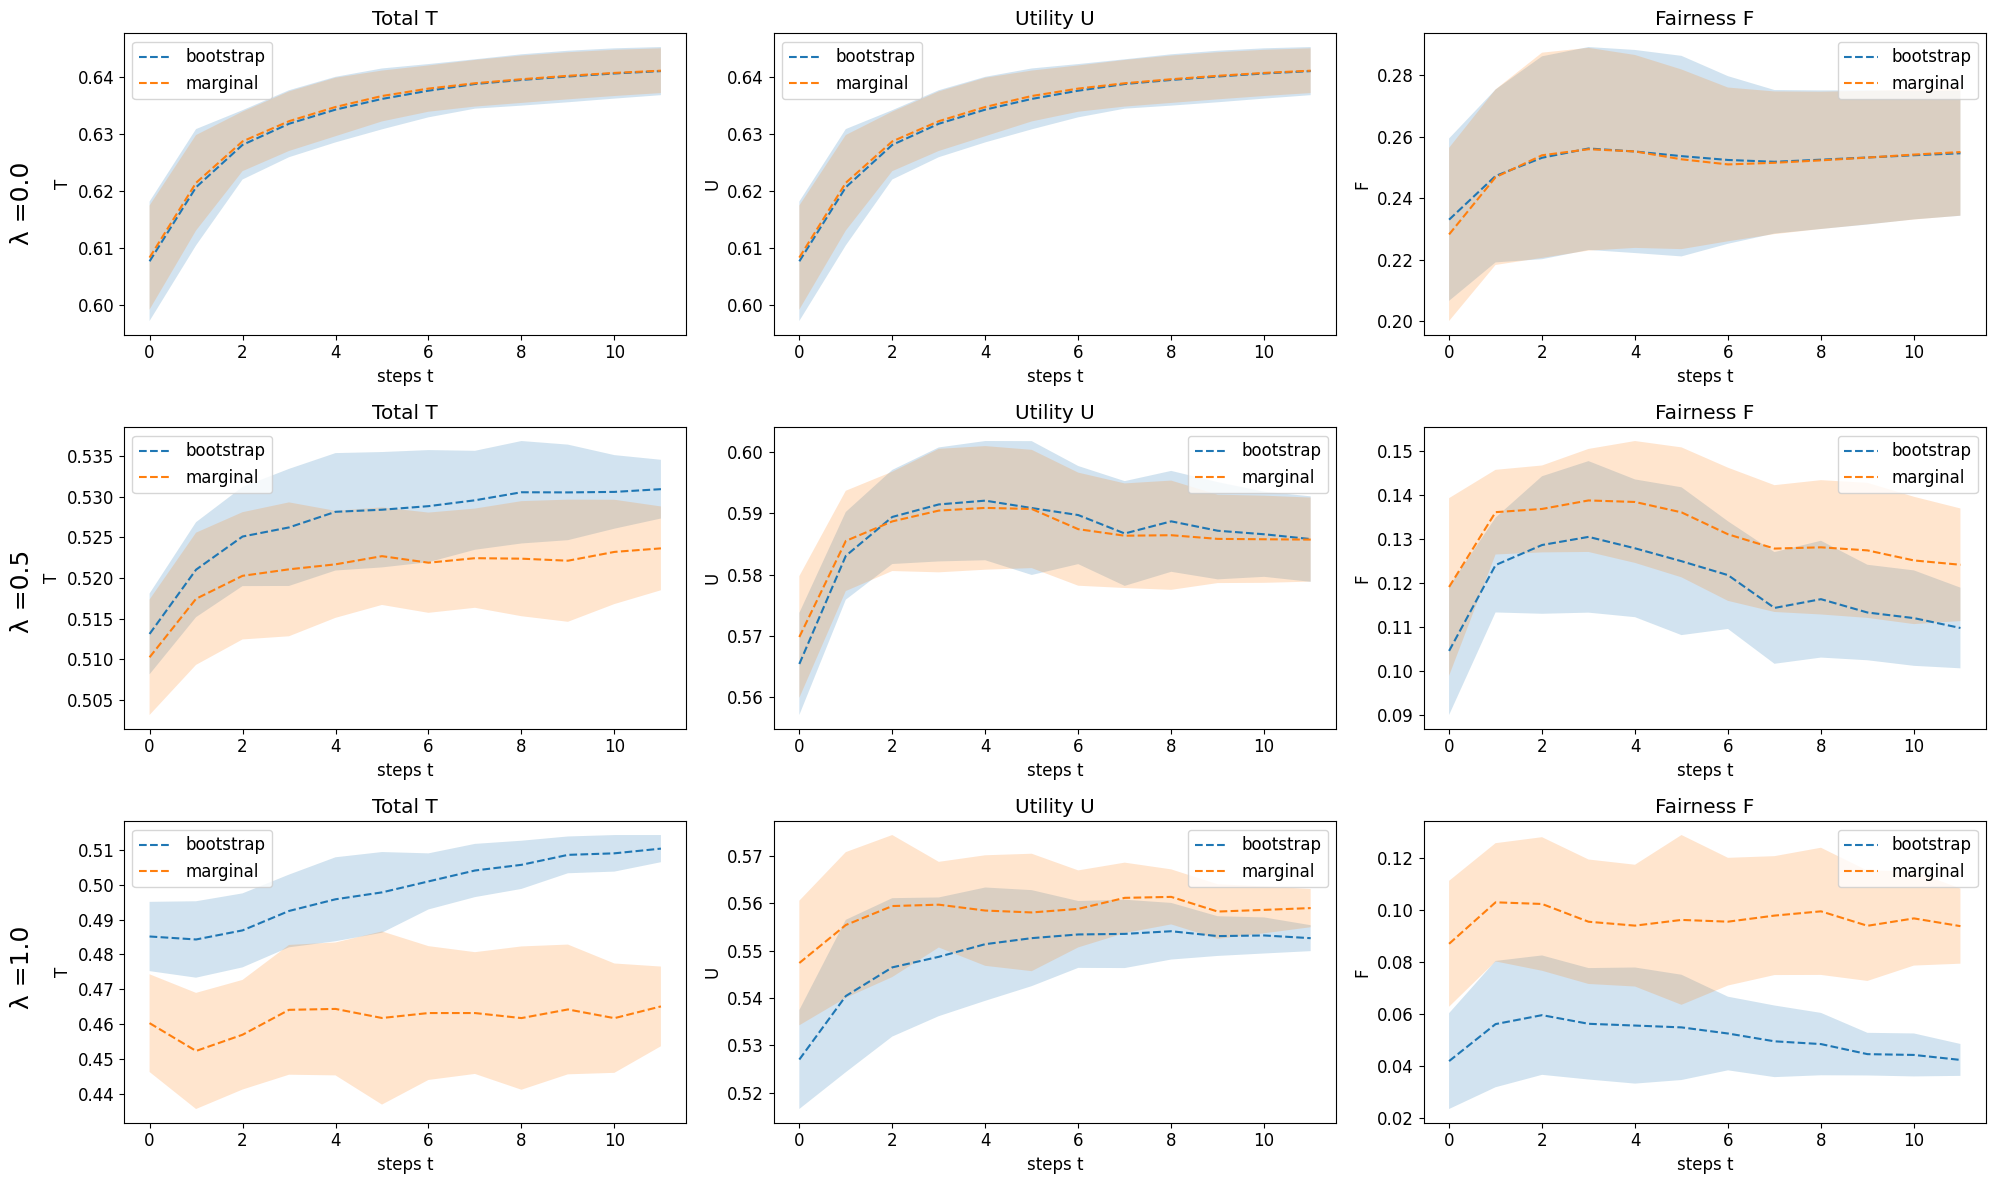

In [30]:
subplots_comparison_paper(ls=ls, losses_list=l_results, save_path=results_path)

In [29]:
def subplots_comparison_paper(ls, losses_list, save_path):
    fig, axes = plt.subplots(3, 3, figsize=(20, 12))
    
    fig.text(0.003, 1/6 - 0.01, f'λ ={ls[2]}', rotation='vertical', fontsize = 18)
    fig.text(0.003, 1/3 + 1/6 - 0.03, f'λ ={ls[1]}', rotation='vertical', fontsize = 18)
    fig.text(0.003, 2/3 + 1/6 - 0.04, f'λ ={ls[0]}', rotation='vertical', fontsize = 18)
    
    for l, ax, losses in zip(ls, axes, losses_list):
        # plot total
        x = range(losses[0]["bootstrap_mean"].shape[0])
        ax[0].plot(x, losses[0]["bootstrap_mean"],"--", label = "bootstrap")
        ax[0].fill_between(x = x,
                         y1 = (losses[0]["bootstrap_mean"]-losses[0]["bootstrap_std"]).values,
                         y2 = (losses[0]["bootstrap_mean"]+losses[0]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[0].plot(x, losses[0]["marginal_mean"],"--", label = "marginal")
        ax[0].fill_between(x = x,
                         y1 = (losses[0]["marginal_mean"]-losses[0]["marginal_std"]).values,
                         y2 = (losses[0]["marginal_mean"]+losses[0]["marginal_std"]).values,
                         alpha = 0.2)
        ax[0].set_title("Total T")
        ax[0].set(xlabel='steps t')
        ax[0].set_ylabel(f'T')
        ax[0].legend()

        # plot utility
        ax[1].plot(x, losses[1]["bootstrap_mean"],"--", label = "bootstrap")
        ax[1].fill_between(x = x,
                         y1 = (losses[1]["bootstrap_mean"]-losses[1]["bootstrap_std"]).values,
                         y2 = (losses[1]["bootstrap_mean"]+losses[1]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[1].plot(x, losses[1]["marginal_mean"],"--", label = "marginal")
        ax[1].fill_between(x = x,
                         y1 = (losses[1]["marginal_mean"]-losses[1]["marginal_std"]).values,
                         y2 = (losses[1]["marginal_mean"]+losses[1]["marginal_std"]).values,
                         alpha = 0.2)
        ax[1].set_title("Utility U")
        ax[1].set(xlabel='steps t', ylabel='U')
        ax[1].legend()

        # fairness
        ax[2].plot(x, losses[2]["bootstrap_mean"],"--", label = "bootstrap")
        ax[2].fill_between(x =x,
                         y1 = (losses[2]["bootstrap_mean"]-losses[2]["bootstrap_std"]).values,
                         y2 = (losses[2]["bootstrap_mean"]+losses[2]["bootstrap_std"]).values,
                         alpha = 0.2)
        ax[2].plot(x, losses[2]["marginal_mean"],"--", label = "marginal")
        ax[2].fill_between(x = x,
                         y1 = (losses[2]["marginal_mean"]-losses[2]["marginal_std"]).values,
                         y2 = (losses[2]["marginal_mean"]+losses[2]["marginal_std"]).values,
                         alpha = 0.2)
        ax[2].set_title("Fairness F")
        ax[2].set(xlabel='steps t', ylabel='F')
        ax[2].legend()
#         ax.suptitle(f"Comparison results λ = {l}")
#     fig.suptitle(f"Comparison results for different λ parameter")
    plt.tight_layout()
    fig.subplots_adjust(left=0.06)
    fig.savefig(save_path + f"/plots/comparison_subplots_paper.png")
    plt.show()
    plt.close()

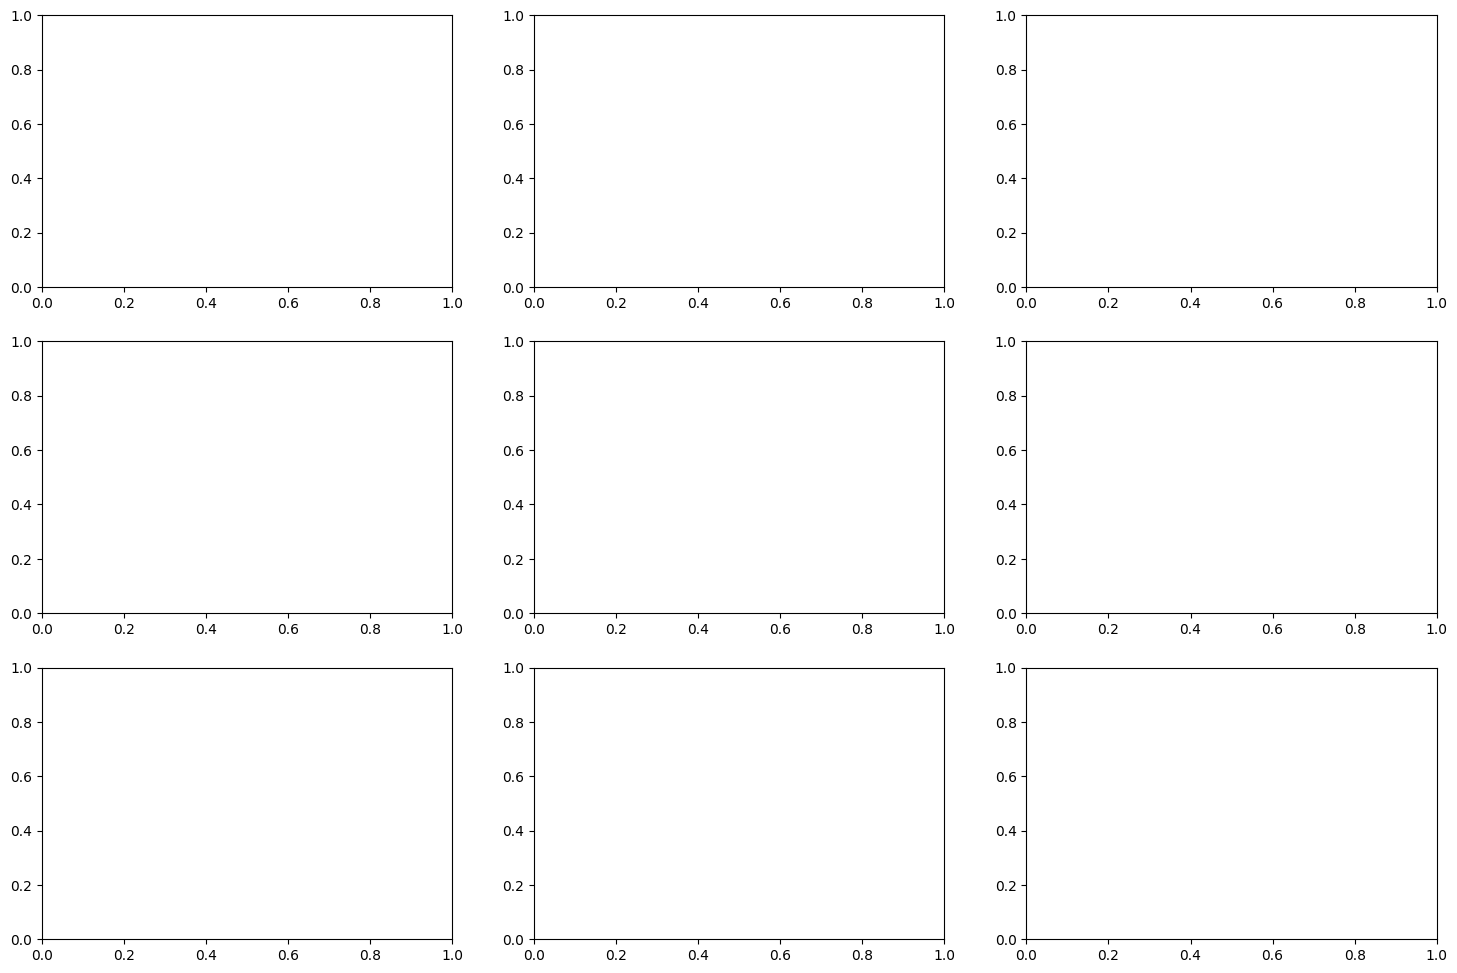

In [21]:
ls = [0.0, 0.4, 0.5]
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

In [39]:
axes

array([[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

In [43]:
for l, ax, losses in zip(ls, axes, l_results):
    print(l)
    print(ax)


0.0
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]
0.4
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]
0.5
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]


In [45]:
losses[0]

,bootstrap_mean,bootstrap_std,marginal_mean,marginal_std
0,0.498035,0.011488,0.494452,0.002819
1,0.525584,0.001784,0.523854,0.000571
2,0.528064,0.000488,0.529366,0.000120
3,0.528996,0.000476,0.531090,0.000055
4,0.529731,0.000971,0.530989,0.000032
5,0.529490,0.000789,0.530968,0.000037
6,0.530085,0.000913,0.530823,0.000071
7,0.530178,0.000853,0.530696,0.000028
8,0.530311,0.000798,0.530507,0.000036
9,0.529781,0.000465,0.529595,0.000010
